In [13]:
from keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [14]:
# .shape -> 維度
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 共有60000筆資料，每筆共有28*28 (2維)

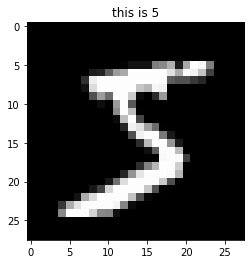

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("this is "+str(y_train[0]))
plt.imshow(x_train[0], cmap="gray")

In [16]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


# 製作模型
### mlp採用1D(維度)，必須攤開28*28=784
### 採用sequential 結構 
### 採用Dense層 (為全連接層Fully-Connected)
### Dense參數 (本層節點數、激活函數、前層節點數(第一層時必帶))
### 激活函數→中間層用relu, 最後輸出用softmax，以避免中間的梯度消失
### 設定節點數為上層節點數除以10

In [28]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256,activation="relu",input_dim=784))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### param 需計算參數 = 784(node)*256(dense) + 256(bias) = 200960
### param 需計算參數 = 256(node)*10(dense) + 10(bias) = 2570

In [30]:
# 預處理資料(題目)

# 1. MLP輸入1D
# 2. 配合框架隨機W: 所有輸入要Normalize(-1~1)(0~1),在調整時才不會造成錯誤估計，而沒有被調整到權重 (其他框架caffe，因為本來就做圖片處理的，不需要調整)

x_train_reshape = x_train.reshape(-1,784) / 255
# -1 為讓電腦自己算 (60000*28*28 = x * 784 ), x = 60000
x_test_reshape = x_test.reshape(-1,784) / 255

x_train_reshape.shape

(60000, 784)

In [32]:
# 預處理資料(答案)
# 十個機率: 0 -> [1,0,0,0,...]
#           1 -> [0,1,0,0,...]

from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat[0])
print(y_test_cat[0])
                            

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# 確定模型的訓練方式